<a href="https://colab.research.google.com/github/anishjohnson/Airbnb-Booking-Analysis/blob/main/Anish_Johnson_NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

# **Import libraries and data.** 📥

In [1]:
# import the libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Mount the drive.
from google.colab import drive
drive.mount('/content/drive/')

# Load the data.
nyc_df = pd.read_csv('/content/drive/MyDrive/Capstone data files/NYC Taxi Data.csv')

Mounted at /content/drive/


# **First look at the data.** 🔢🔠🔣

In [3]:
# Show us the data.
nyc_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [4]:
nyc_df.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,N,198


In [5]:
# Check the shape of our data.
shape = nyc_df.shape
print(f'The dataset contains {shape[0]} rows and {shape[1]} columns.')

The dataset contains 1458644 rows and 11 columns.


In [6]:
# Check if it contains null values.
nyc_df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

***Wow! The data consists zero null values, good for us.***

In [7]:
# Only originals needed, remove the duplicates.
duplicates = nyc_df.duplicated().sum()

if duplicates == 0:
  print('No duplicates exist we are good to go.👌')
else:
  print(duplicates,'exist remove them.')

No duplicates exist we are good to go.👌


In [8]:
# Reveal information about the data.
nyc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


***What info did it reveal*** 🤔***?***
* *id can be dropped - as every ride would have different id it would'nt give any useful insight.*
* *pickup_datetime and dropoff_time need to be changed to datetime format - currently they are in string (object) format.*
* *Currently 7 numerical and 4 categorical features exist.*

In [9]:
# Drop id.
nyc_df.drop('id', inplace=True, axis=1)

In [10]:
# Change format for pickup_datetime and dropoff_time.
nyc_df['pickup_datetime'] = pd.to_datetime(nyc_df['pickup_datetime'])
nyc_df['dropoff_datetime'] = pd.to_datetime(nyc_df['dropoff_datetime'])

In [11]:
# Recheck if formats been changed.
nyc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   vendor_id           1458644 non-null  int64         
 1   pickup_datetime     1458644 non-null  datetime64[ns]
 2   dropoff_datetime    1458644 non-null  datetime64[ns]
 3   passenger_count     1458644 non-null  int64         
 4   pickup_longitude    1458644 non-null  float64       
 5   pickup_latitude     1458644 non-null  float64       
 6   dropoff_longitude   1458644 non-null  float64       
 7   dropoff_latitude    1458644 non-null  float64       
 8   store_and_fwd_flag  1458644 non-null  object        
 9   trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(1)
memory usage: 111.3+ MB


***Bring in the statistics.*** *📄*

In [12]:
nyc_df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


***Points to be noted.*** *📝*
* *Passenger count ranges from 0 to 9, but we will have to replace the rows where passenger count is 0 since our goal is to find the trip duration and passenger count being 0 would mean it has takken no trip which is no use to us. It also seems to have some outliers that need to be removed.*
* *Rest of the data seems fine but trip_duration is bit shaddy, the 75th percentile is 1.075000e+03 and the max value is 3.526282e+06 which indicates it is holding some outliers which needs to be removed.*

***Now lets bring in the charts and diagrams for better understanding.*** *😊*

# **EDA:**  📈📉📊

In [13]:
nyc_df.head(1)

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.96463,40.765602,N,455


***Lets start with the dependent variable.***

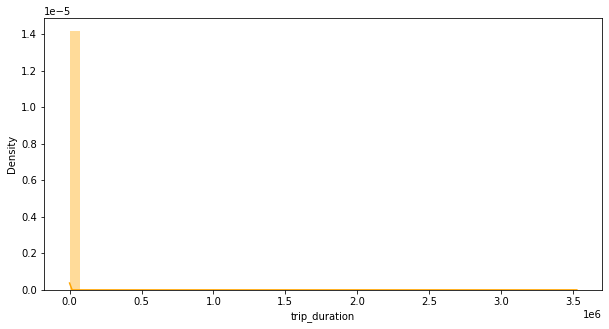

In [14]:
# Check out the trip_duration.
plt.figure(figsize=(10,5))
sns.distplot(nyc_df['trip_duration'], color='orange')
plt.show()

***trip_duration is positively skewed, can be treated with a log transformation.***

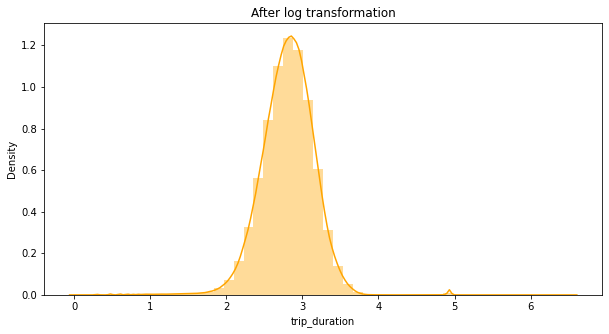

In [15]:
# Apply log transformation and plot it.
plt.figure(figsize=(10,5))
plt.title('After log transformation')
sns.distplot(np.log10(nyc_df['trip_duration']), color='orange')
plt.show()

***Seems perfect! now lets checkout the other features.*** *👀*

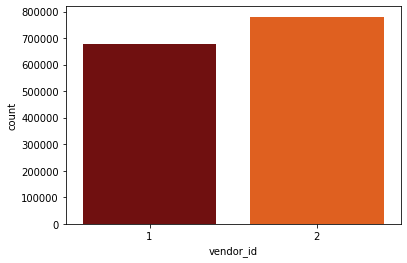

In [16]:
# How many vendors do we have.
sns.countplot(nyc_df['vendor_id'], palette='gist_heat')
plt.show()

***vendor 2 has made most of the trips, which could mean vendor 2 is most preferred.***

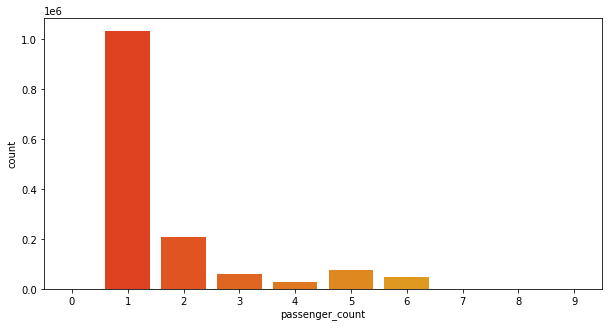

In [17]:
# Passenger count.
plt.figure(figsize=(10,5))
sns.countplot(nyc_df['passenger_count'], palette='autumn')
plt.show()

* ***Most of the trips contain single passenger whereas 7,8,9 passengers are the extreme cases, there also seems someething wrong about the 0 passengers as we saw before.***
* ***We will have to take a closer look at the passenger values to understand it better, the only two possiblities are either the trip didnt happen or the passenger reccord was not entered.:***

In [18]:
# Analyse passenger_count.
nyc_df['passenger_count'].value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

In [19]:
nyc_df['passenger_count'].describe()

count    1.458644e+06
mean     1.664530e+00
std      1.314242e+00
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      9.000000e+00
Name: passenger_count, dtype: float64

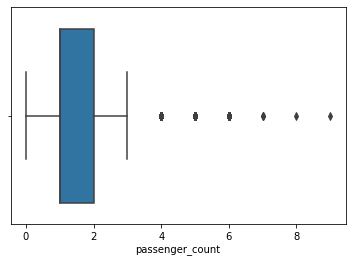

In [20]:
sns.boxplot(nyc_df['passenger_count'])
plt.show()

In [21]:
nyc_df[nyc_df['passenger_count']==0].head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
62744,2,2016-06-06 16:39:09,2016-06-07 16:30:50,0,-73.776367,40.645248,-73.776360,40.645260,N,85901
136519,2,2016-01-01 05:01:32,2016-01-01 05:01:36,0,-73.993134,40.757473,-73.993294,40.757538,N,4
194288,2,2016-02-21 01:33:52,2016-02-21 01:36:27,0,-73.946243,40.772903,-73.946770,40.774841,N,155
217765,1,2016-01-04 12:24:17,2016-01-04 13:01:48,0,-73.815224,40.700081,-73.950699,40.755222,N,2251
263809,1,2016-05-23 23:37:37,2016-05-23 23:37:45,0,-73.861633,40.705029,-73.861633,40.705029,N,8


***What did we see:*** *👀*
* *we knew most of the passenger data ranged from 1 to 6, and 7,8,9 acting as outliers which we will have to get rid of.*
* *To handle the 0 passenger counts we will replace it with 1 as in most of the cases the corresponding trip duration is not 0 which indicates the trip did happen.*

In [22]:
# Remove the outliers from passenger_count.
nyc_df = nyc_df[nyc_df['passenger_count'] <= 6]  # This will remove passenger values with 7,8,9 values.

In [23]:
# Now replace 0 with 1.
nyc_df['passenger_count'] = nyc_df['passenger_count'].map(lambda x: 1 if x==0 else x)

In [24]:
# Recheck the passenger_count.
nyc_df['passenger_count'].value_counts()

1    1033600
2     210318
5      78088
3      59896
6      48333
4      28404
Name: passenger_count, dtype: int64

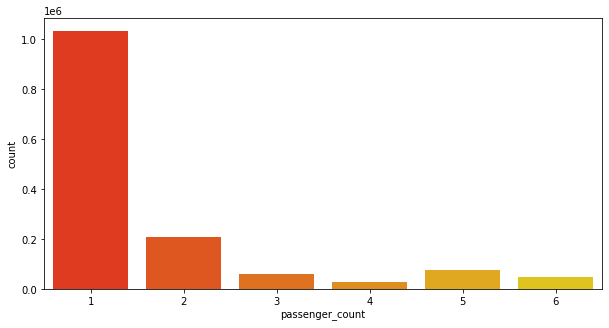

In [25]:
# Recheck Passenger count.
plt.figure(figsize=(10,5))
sns.countplot(nyc_df['passenger_count'], palette='autumn')
plt.show()

***Yess!! now the passenger data looks good.*** *👍*

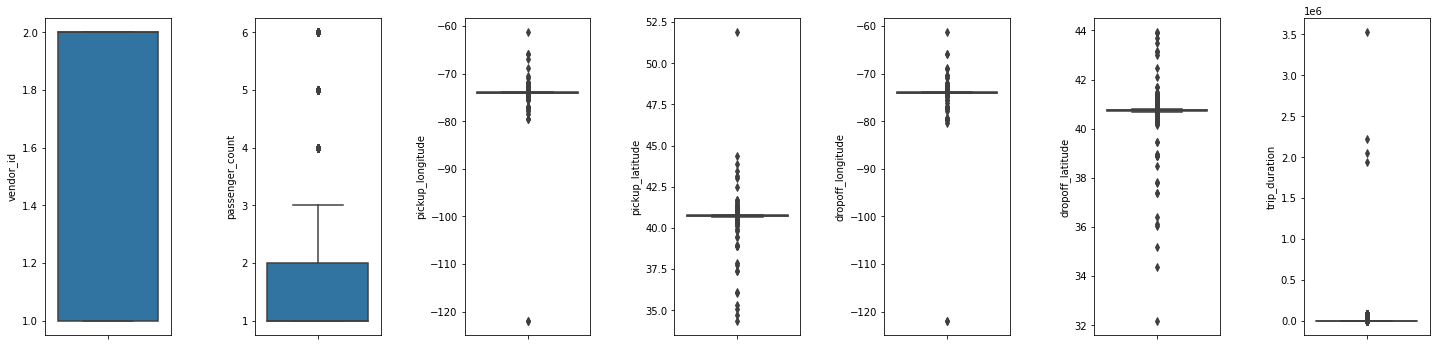

In [26]:
# Boxplots.
names = nyc_df.describe().columns
ncols = 7
fig, axes = plt.subplots(1,ncols, figsize=(20,5))
fig.tight_layout(w_pad=5)

for name, ax in zip(names, axes.flatten()):
    sns.boxplot(y=name, data=nyc_df, ax=ax)    
plt.show()

***What do boxplots tell,***
* *vendor_id is a discrete variable with no outliers present.*
* *rest of the data contains large number of outliers that need to be removed - to remove these outliers we can use the IQR method.*
* *skewness is present in the data.*

***What relation do independent features have with trip_duration?*** *🎎*

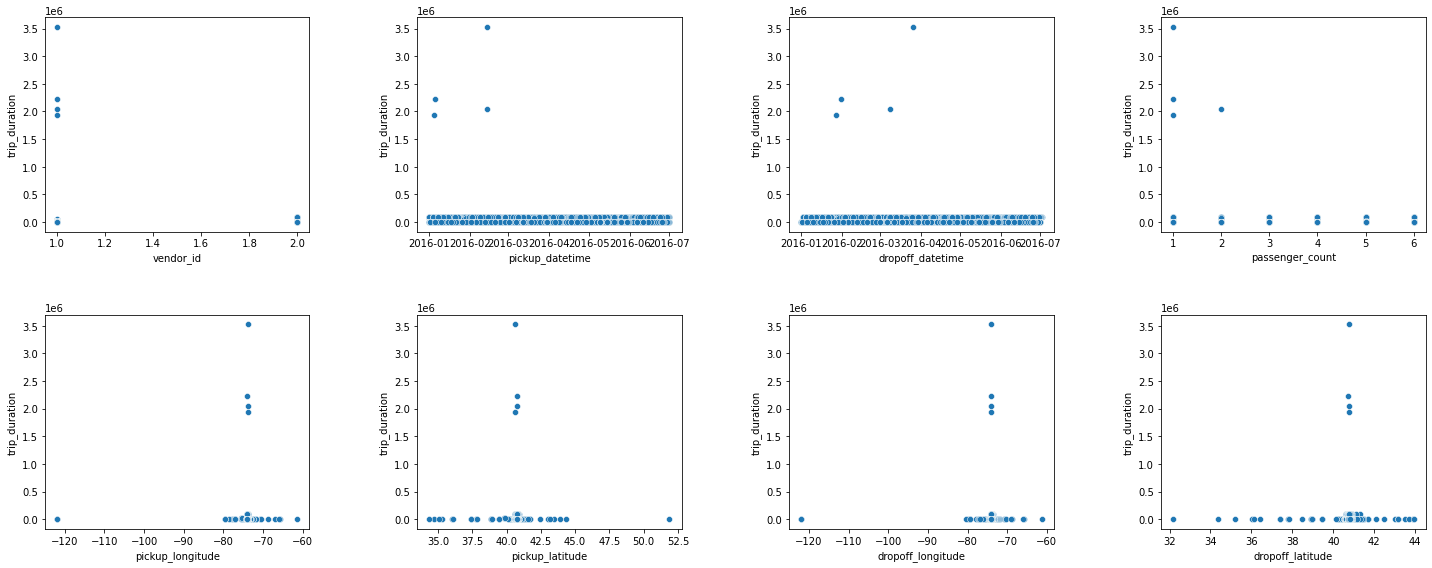

In [27]:
# Get scatter plots between independent features and trip_duration.

f, ax = plt.subplots(2,4,figsize=(20,8))
vis1 = sns.scatterplot(x=nyc_df["vendor_id"],y=nyc_df['trip_duration'], ax= ax[0][0])
vis2 = sns.scatterplot(x=nyc_df["pickup_datetime"],y=nyc_df['trip_duration'], ax=ax[0][1])
vis3 = sns.scatterplot(x=nyc_df["dropoff_datetime"],y=nyc_df['trip_duration'], ax=ax[0][2])
vis4 = sns.scatterplot(x=nyc_df["passenger_count"],y=nyc_df['trip_duration'], ax=ax[0][3])
vis5 = sns.scatterplot(x=nyc_df["pickup_longitude"],y=nyc_df['trip_duration'], ax= ax[1][0])
vis6 = sns.scatterplot(x=nyc_df["pickup_latitude"],y=nyc_df['trip_duration'], ax=ax[1][1])
vis7 = sns.scatterplot(x=nyc_df["dropoff_longitude"],y=nyc_df['trip_duration'], ax=ax[1][2])
vis8 = sns.scatterplot(x=nyc_df["dropoff_latitude"],y=nyc_df['trip_duration'], ax=ax[1][3])

f.tight_layout(h_pad=4, w_pad=6)
plt.show()

# **Feature Engineering** ⚙️⚒️🪛